In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("housing.csv")

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis= 1)
y = data['median_house_value']

In [12]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
train_data = X_train.join(y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17843,-121.87,37.43,22.0,3805.0,596.0,2118.0,621.0,6.2892,<1H OCEAN,254200.0
15785,-122.39,37.78,3.0,3464.0,1179.0,1441.0,919.0,4.7105,NEAR BAY,275000.0
17292,-119.64,34.43,32.0,1872.0,318.0,749.0,296.0,4.6250,<1H OCEAN,500001.0
5970,-117.78,34.09,32.0,2643.0,516.0,1862.0,478.0,3.7177,INLAND,177200.0
10016,-121.18,39.23,8.0,2112.0,360.0,782.0,344.0,3.7125,INLAND,175000.0
...,...,...,...,...,...,...,...,...,...,...
18417,-121.84,37.27,16.0,2429.0,387.0,1293.0,363.0,5.5000,<1H OCEAN,253200.0
9577,-120.55,37.32,21.0,1410.0,229.0,590.0,205.0,3.3194,INLAND,141400.0
13342,-117.65,34.03,15.0,4420.0,903.0,2373.0,858.0,3.4490,INLAND,149100.0
5600,-118.27,33.79,39.0,1513.0,365.0,1227.0,354.0,3.3929,<1H OCEAN,184600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

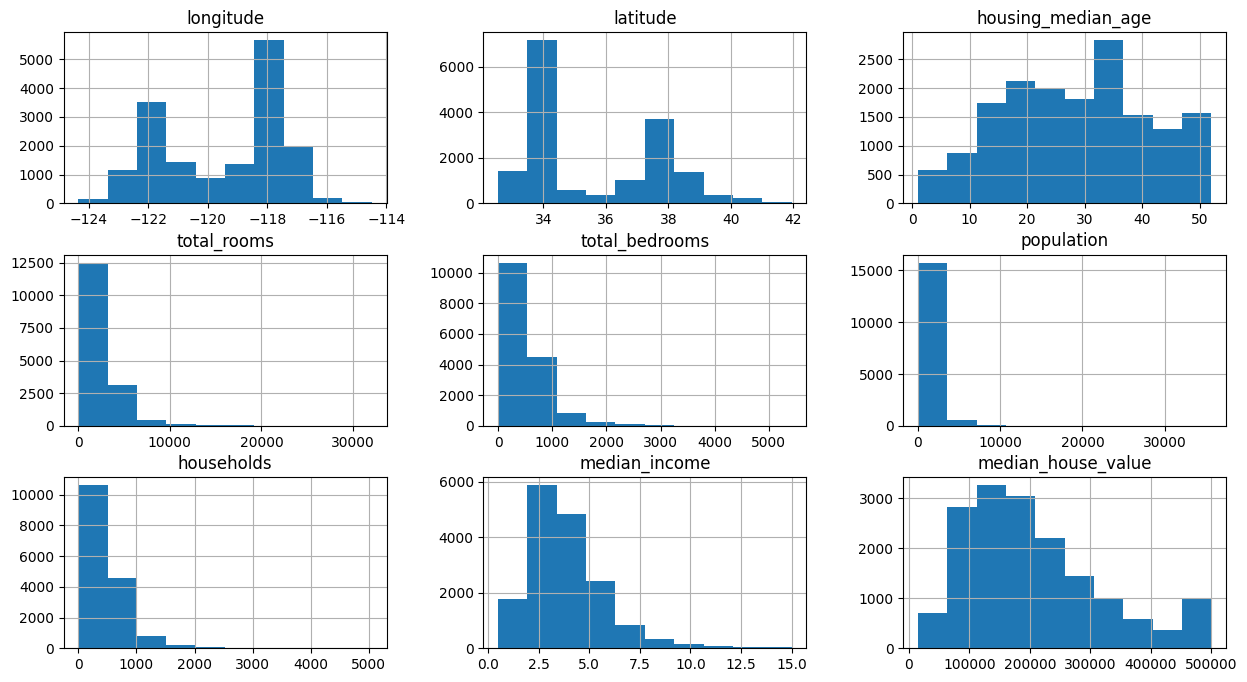

In [17]:
train_data.hist(figsize = (15, 8))

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

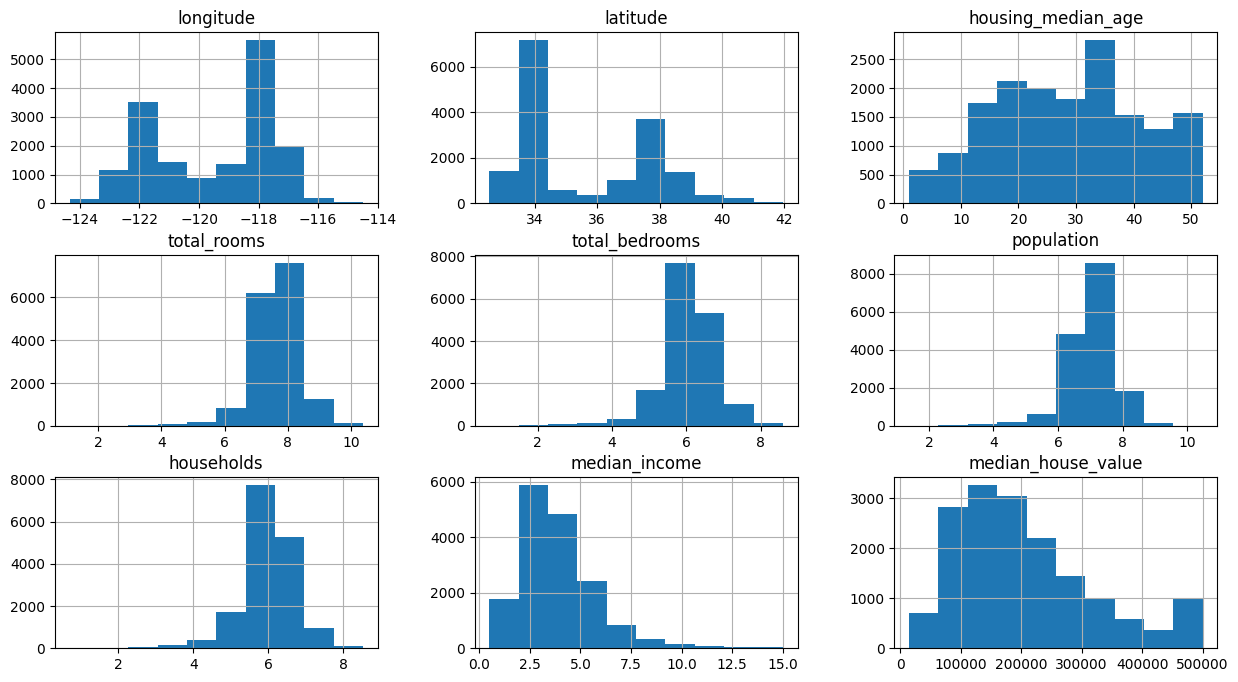

In [19]:
train_data.hist(figsize=(15, 8))

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17843,-121.87,37.43,22.0,8.244334,6.391917,7.658700,6.432940,6.2892,<1H OCEAN,254200.0
15785,-122.39,37.78,3.0,8.150468,7.073270,7.273786,6.824374,4.7105,NEAR BAY,275000.0
17292,-119.64,34.43,32.0,7.535297,5.765191,6.620073,5.693732,4.6250,<1H OCEAN,500001.0
5970,-117.78,34.09,32.0,7.880048,6.248043,7.529943,6.171701,3.7177,INLAND,177200.0
10016,-121.18,39.23,8.0,7.655864,5.888878,6.663133,5.843544,3.7125,INLAND,175000.0
...,...,...,...,...,...,...,...,...,...,...
18417,-121.84,37.27,16.0,7.795647,5.961005,7.165493,5.897154,5.5000,<1H OCEAN,253200.0
9577,-120.55,37.32,21.0,7.252054,5.438079,6.381816,5.327876,3.3194,INLAND,141400.0
13342,-117.65,34.03,15.0,8.394121,6.806829,7.772332,6.755769,3.4490,INLAND,149100.0
5600,-118.27,33.79,39.0,7.322510,5.902633,7.113142,5.872118,3.3929,<1H OCEAN,184600.0


In [21]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7242
INLAND        5199
NEAR OCEAN    2101
NEAR BAY      1800
ISLAND           4
Name: count, dtype: int64

In [22]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17843,True,False,False,False,False
15785,False,False,False,True,False
17292,True,False,False,False,False
5970,False,True,False,False,False
10016,False,True,False,False,False
...,...,...,...,...,...
18417,True,False,False,False,False
9577,False,True,False,False,False
13342,False,True,False,False,False
5600,True,False,False,False,False


In [23]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17843,-121.87,37.43,22.0,8.244334,6.391917,7.658700,6.432940,6.2892,<1H OCEAN,254200.0,True,False,False,False,False
15785,-122.39,37.78,3.0,8.150468,7.073270,7.273786,6.824374,4.7105,NEAR BAY,275000.0,False,False,False,True,False
17292,-119.64,34.43,32.0,7.535297,5.765191,6.620073,5.693732,4.6250,<1H OCEAN,500001.0,True,False,False,False,False
5970,-117.78,34.09,32.0,7.880048,6.248043,7.529943,6.171701,3.7177,INLAND,177200.0,False,True,False,False,False
10016,-121.18,39.23,8.0,7.655864,5.888878,6.663133,5.843544,3.7125,INLAND,175000.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,-121.84,37.27,16.0,7.795647,5.961005,7.165493,5.897154,5.5000,<1H OCEAN,253200.0,True,False,False,False,False
9577,-120.55,37.32,21.0,7.252054,5.438079,6.381816,5.327876,3.3194,INLAND,141400.0,False,True,False,False,False
13342,-117.65,34.03,15.0,8.394121,6.806829,7.772332,6.755769,3.4490,INLAND,149100.0,False,True,False,False,False
5600,-118.27,33.79,39.0,7.322510,5.902633,7.113142,5.872118,3.3929,<1H OCEAN,184600.0,True,False,False,False,False


In [24]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17843,-121.87,37.43,22.0,8.244334,6.391917,7.658700,6.432940,6.2892,254200.0,True,False,False,False,False
15785,-122.39,37.78,3.0,8.150468,7.073270,7.273786,6.824374,4.7105,275000.0,False,False,False,True,False
17292,-119.64,34.43,32.0,7.535297,5.765191,6.620073,5.693732,4.6250,500001.0,True,False,False,False,False
5970,-117.78,34.09,32.0,7.880048,6.248043,7.529943,6.171701,3.7177,177200.0,False,True,False,False,False
10016,-121.18,39.23,8.0,7.655864,5.888878,6.663133,5.843544,3.7125,175000.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,-121.84,37.27,16.0,7.795647,5.961005,7.165493,5.897154,5.5000,253200.0,True,False,False,False,False
9577,-120.55,37.32,21.0,7.252054,5.438079,6.381816,5.327876,3.3194,141400.0,False,True,False,False,False
13342,-117.65,34.03,15.0,8.394121,6.806829,7.772332,6.755769,3.4490,149100.0,False,True,False,False,False
5600,-118.27,33.79,39.0,7.322510,5.902633,7.113142,5.872118,3.3929,184600.0,True,False,False,False,False


In [26]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924063,-0.109961,0.031060,0.062079,0.112075,0.058405,-0.015461,-0.045867,0.321875,-0.056217,0.009429,-0.474671,0.044024
latitude,-0.924063,1.000000,0.013732,-0.031993,-0.067909,-0.137722,-0.089034,-0.079555,-0.144628,-0.447755,0.352655,-0.016594,0.358616,-0.160809
housing_median_age,-0.109961,0.013732,1.000000,-0.318183,-0.277805,-0.247260,-0.247328,-0.115876,0.103334,0.042747,-0.231658,0.014043,0.258905,0.016097
total_rooms,0.031060,-0.031993,-0.318183,1.000000,0.946040,0.862892,0.930994,0.203337,0.158675,0.022078,-0.011669,-0.010062,-0.018125,0.000891
total_bedrooms,0.062079,-0.067909,-0.277805,0.946040,1.000000,0.896247,0.973997,-0.027094,0.053917,0.043519,-0.044170,-0.004051,-0.018182,0.014067
population,0.112075,-0.137722,-0.247260,0.862892,0.896247,1.000000,0.931468,-0.004540,-0.018394,0.117854,-0.071666,-0.015923,-0.060960,-0.017434
households,0.058405,-0.089034,-0.247328,0.930994,0.973997,0.931468,1.000000,0.002657,0.073904,0.074451,-0.086495,-0.011893,-0.006984,0.016948
median_income,-0.015461,-0.079555,-0.115876,0.203337,-0.027094,-0.004540,0.002657,1.000000,0.688657,0.168382,-0.236992,-0.009513,0.055142,0.028734
median_house_value,-0.045867,-0.144628,0.103334,0.158675,0.053917,-0.018394,0.073904,0.688657,1.000000,0.256009,-0.484472,0.022438,0.161216,0.142346
<1H OCEAN,0.321875,-0.447755,0.042747,0.022078,0.043519,0.117854,0.074451,0.168382,0.256009,1.000000,-0.609108,-0.013954,-0.313746,-0.342527


<Axes: >

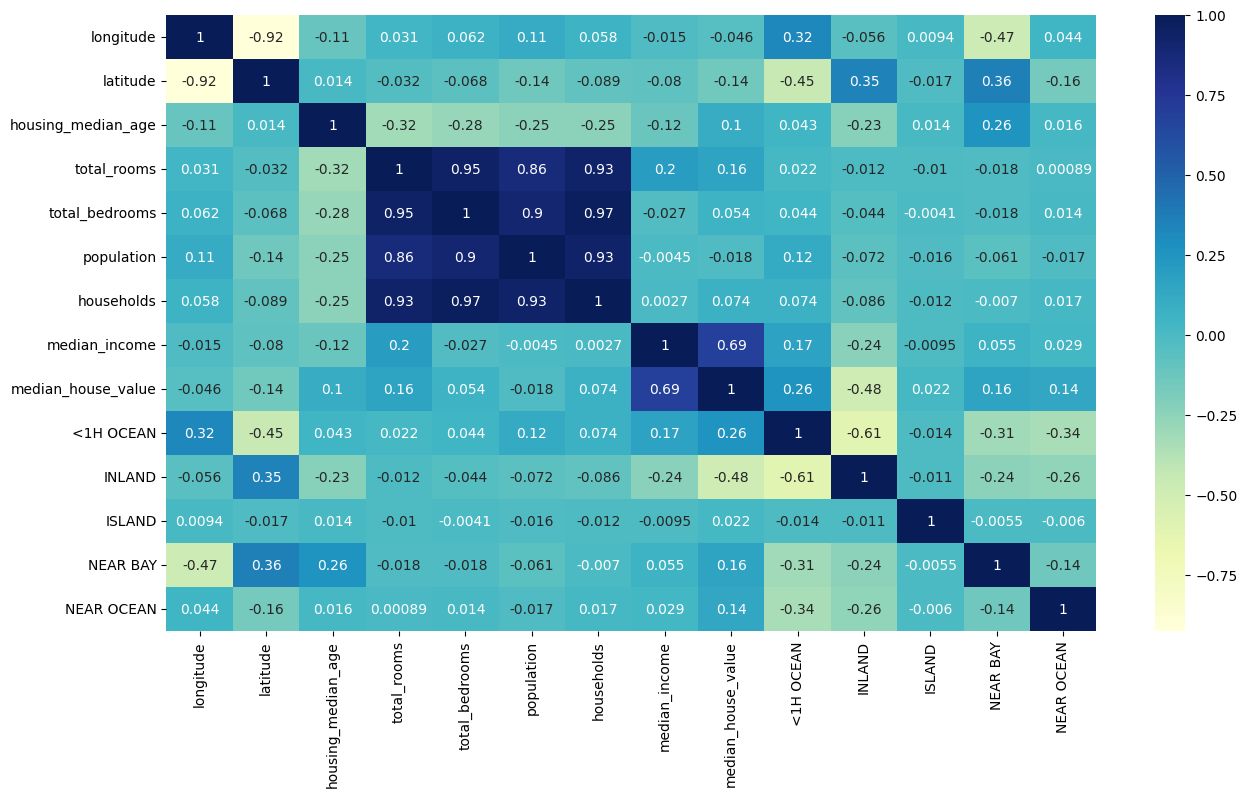

In [27]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

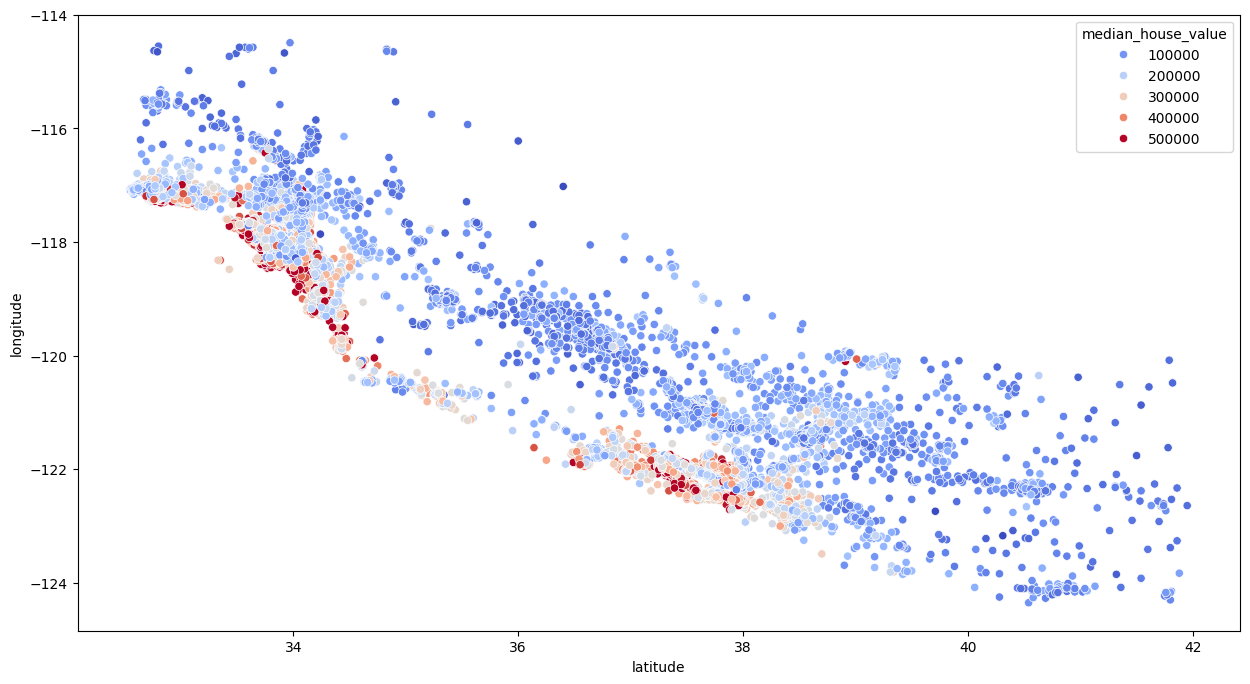

In [28]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette = "coolwarm")

In [32]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_ratio'] = train_data['total_rooms'] / train_data['households']

<Axes: >

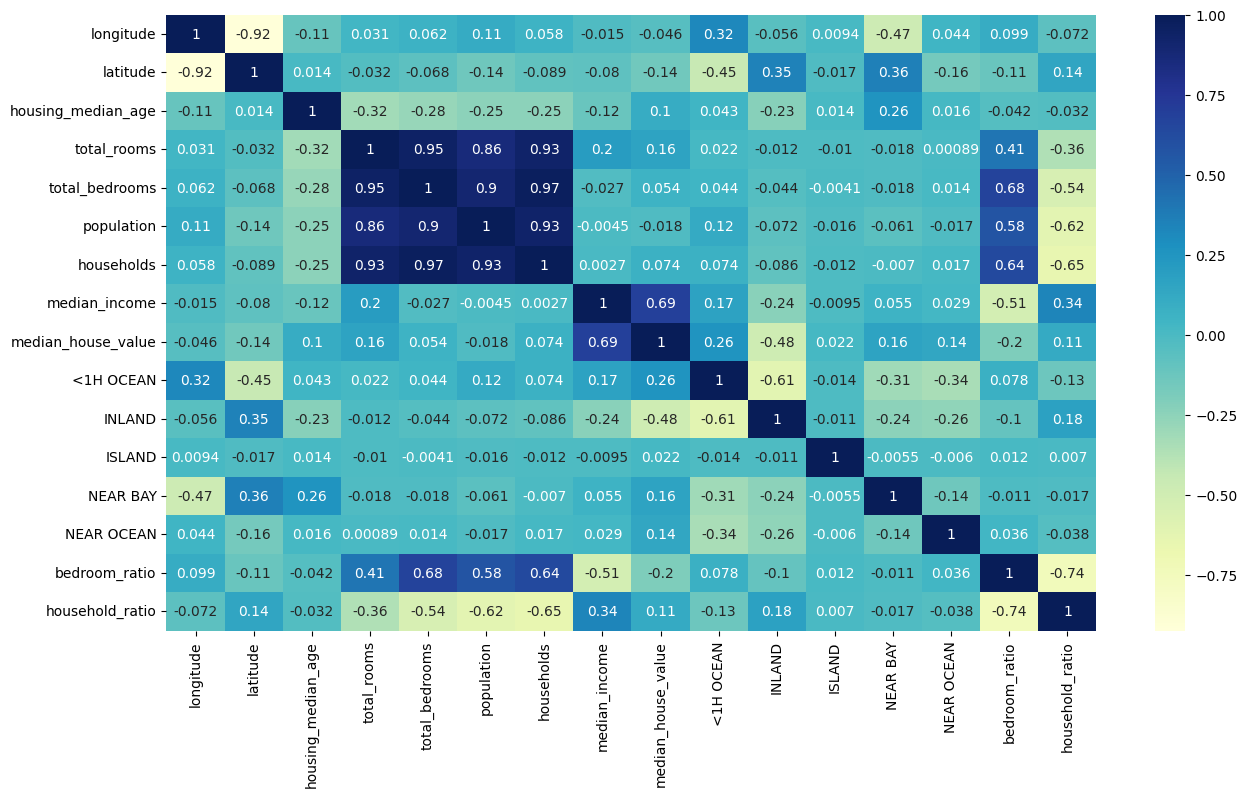

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")